In [1]:
from gridworld import GridworldEnv
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

In [2]:
env = GridworldEnv()
env.reset()

(np.int64(4), {})

In [ ]:
# Custom print to show state values inside the grid
def grid_print(V, k=None):
    ax = sns.heatmap(
        V.reshape(env.shape),
        annot=True,
        square=True,
        cbar=False,
        cmap="Blues",
        xticklabels=False,
        yticklabels=False,
    )

    if k:
        ax.set(title="State values after K = {0}".format(k))
    else:
        ax.set(title="State Values".format(k))
    plt.show()

In [ ]:
# Value Iteration
def value_iteration(env, discount_factor=1.0, theta=0.00001):
    """
    Varry out Value iteration given an environment and a full description
    of the environment's dynamics.

    Args:
        env: OpenAI env. env.P -> transition dynamics of the environment.
            env.P[s][a] [(prob, next_state, reward, done)].
            env.nS is number of states in the environment.
            env.nA is number of actions in the environment.
        discount_factor: Gamma discount factor.
        theta: tolernace level to stop the iterations

    Returns:
        policy: [S, A] shaped matrix representing optimal policy.
        value : [S] length vector representing optimal value
    """

    def argmax_a(arr):
        """
        Return idx of max element in an array.
        """
        max_idx = []
        max_val = float("-inf")
        for idx, elem in enumerate(arr):
            if elem == max_val:
                max_idx.append(idx)
            elif elem > max_val:
                max_idx = [idx]
                max_val = elem
        return max_idx

    optimal_policy = np.zeros([env.nS, env.nA])
    V = np.zeros(env.nS)
    V_new = np.copy(V)

    while True:
        delta = 0
        # For each state, perform a "greedy backup"
        for s in range(env.nS):
            q = np.zeros(env.nA)
            # Look at the possible next actions
            for a in range(env.nA):
                # For each action, look at the possible next states
                # to calculate q[s,a]
                for prob, next_state, reward, done in env.P[s][a]:
                    # Calculate the value for each action as per backup diagram
                    if not done:
                        q[a] += prob * (reward + discount_factor * V[next_state])
                    else:
                        q[a] += prob * reward

            # find the maximum value over all possible actions
            # and store updated state value
            V_new[s] = q.max()
            # How much our value function changed (across any states)
            delta = max(delta, np.abs(V_new[s] - V[s]))

        V = np.copy(V_new)

        # Stop if change is below a threshold
        if delta < theta:
            break

    # V(s) has optimal values. Use these values and one step backup
    # to calculate optimal policy
    for s in range(env.nS):
        q = np.zeros(env.nA)
        # Look at the possible next actions
        for a in range(env.nA):
            # For each action, look at the possible next states
            # and calculate q[s,a]
            for prob, next_state, reward, done in env.P[s][a]:
                # Calculate the value for each action as per backup diagram
                if not done:
                    q[a] += prob * (reward + discount_factor * V[next_state])
                else:
                    q[a] += prob * reward

        # find the optimal actions
        # We are returning stochastic policy which will assign equal
        # probability to all those actions which are equal to maximum value
        best_actions = argmax_a(q)
        optimal_policy[s, best_actions] = 1.0 / len(best_actions)

    return optimal_policy, V

Optimal Policy
 [[0.25 0.25 0.25 0.25]
 [0.   0.   0.   1.  ]
 [0.   0.   0.   1.  ]
 [0.   0.   0.5  0.5 ]
 [1.   0.   0.   0.  ]
 [0.5  0.   0.   0.5 ]
 [0.25 0.25 0.25 0.25]
 [0.   0.   1.   0.  ]
 [1.   0.   0.   0.  ]
 [0.25 0.25 0.25 0.25]
 [0.   0.5  0.5  0.  ]
 [0.   0.   1.   0.  ]
 [0.5  0.5  0.   0.  ]
 [0.   1.   0.   0.  ]
 [0.   1.   0.   0.  ]
 [0.25 0.25 0.25 0.25]]


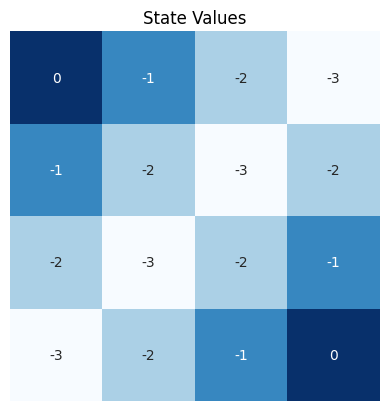

In [5]:
# Run policy iteration on Grid world
pi_star, V_star = value_iteration(env)

# Print Optimal policy
print("Optimal Policy\n", pi_star)

# Print optimal state values
grid_print(V_star.reshape(env.shape))